### Importing necessary libraries

In [1]:
#pip install xgboost

In [2]:
# Data manipulation and handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Data preprocessing and EDA libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

# Model Selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost 
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

#Unsupervised ML Library
from sklearn.cluster import KMeans

# Warning filter Library
import warnings
warnings.filterwarnings("ignore")

# Multi-Collinearity Test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


In [3]:
# Loading the Dataframe

In [4]:
df = pd.read_excel('Capstone Project.xlsx')

In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Observations from df.info()
1. There are no null values
2. We have 1030 rows and 9 columns
3. Dependent variable = strength
4. Rest all of the columns are independent variables

In [7]:
# PRoblem Statement
# Need to find the strength of the cement 
# Regression problem

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Analysis from Descriptive statistics
1. There may be skewness in the data in all columns
2. There might be chance of outliers if we compare quartile of some columns
3. Since minimum and q1 values are same for slag and ash, so we do not have outliers in the lower whisker region
4. The range of values for 'age' is from 1 to 365. We can say that, the values are in days

In [10]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'feature_name': col,
                'count': my_df[col].count(),
                'quartile1': my_df[col].quantile(.25),
                'quartile2': my_df[col].quantile(.50),
                'quartile3': my_df[col].quantile(.75),
                'mean': my_df[col].mean(),
                'max': my_df[col].max(),
                'variance': round(my_df[col].var()),
                'standard_deviation': my_df[col].std(),
                'skewness': my_df[col].skew(),
                'kurtosis': my_df[col].kurt()
            })
        result.append(stats)
    result_df = pd.DataFrame(result)
    # skewness type:
    skewness_label = []
    for i in result_df['skewness']:
        if i <= -1:
            skewness_label.append('Highly negatively skewed')
        elif -1 < i <= -0.5:
            skewness_label.append('Moderately negatively skewed')
        elif -0.5 < i < 0:
            skewness_label.append('Fairly negatively skewed')
        elif 0 <= i <= 0.5:
            skewness_label.append('Fairly positively skewed')
        elif 0.5 <= i < 1:
            skewness_label.append('Moderately positively skewed')
        elif i >= 1:
            skewness_label.append('Highly positively skewed')
    result_df['skewness_comment'] = skewness_label
    
    # kurtosis type:
    kurtosis_label = []
    for j in result_df['kurtosis']:
        if j >= 1:
            kurtosis_label.append('Leptokurtic Curve')
        elif j <= -1:
            kurtosis_label.append('Platykurtic Curve')
        else:
            kurtosis_label.append('Mesokurtic Curve')
    result_df['kurtosis_comment'] = kurtosis_label
    
    # Outliers
    outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            q1 = my_df[col].quantile(.25)
            q2 = my_df[col].quantile(.50)
            q3 = my_df[col].quantile(.75)
            iqr = q3 - q1
            lower_whisker = q1 - 1.50 * iqr
            upper_whisker = q3 + 1.50 * iqr
            if len(my_df[(my_df[col] < lower_whisker) | (my_df[col] > upper_whisker)]) > 0:
                outliers_label.append('Have outliers')
            else:
                outliers_label.append('No outliers')
    result_df['outlier_comment'] = outliers_label
    return result_df

In [11]:
custom_summary(df)

,feature_name,count,quartile1,quartile2,quartile3,mean,max,variance,standard_deviation,skewness,kurtosis,skewness_comment,kurtosis_comment,outlier_comment
0,cement,1030,192.375,272.900,350.000,281.167864,540.0,10922,104.506364,0.509481,-0.520652,Moderately positively skewed,Mesokurtic Curve,No outliers
1,slag,1030,0.000,22.000,142.950,73.895825,359.4,7444,86.279342,0.800717,-0.508175,Moderately positively skewed,Mesokurtic Curve,Have outliers
2,ash,1030,0.000,0.000,118.300,54.188350,200.1,4096,63.997004,0.537354,-1.328746,Moderately positively skewed,Platykurtic Curve,No outliers
3,water,1030,164.900,185.000,192.000,181.567282,247.0,456,21.354219,0.074628,0.122082,Fairly positively skewed,Mesokurtic Curve,Have outliers
4,superplastic,1030,0.000,6.400,10.200,6.204660,32.2,36,5.973841,0.907203,1.411269,Moderately positively skewed,Leptokurtic Curve,Have outliers
5,coarseagg,1030,932.000,968.000,1029.400,972.918932,1145.0,6046,77.753954,-0.040220,-0.599016,Fairly negatively skewed,Mesokurtic Curve,No outliers
6,fineagg,1030,730.950,779.500,824.000,773.580485,992.6,6428,80.175980,-0.253010,-0.102177,Fairly negatively skewed,Mesokurtic Curve,Have outliers
7,age,1030,7.000,28.000,56.000,45.662136,365.0,3990,63.169912,3.269177,12.168989,Highly positively skewed,Leptokurtic Curve,Have outliers
8,strength,1030,23.710,34.445,46.135,35.817961,82.6,279,16.705742,0.416977,-0.313725,Fairly positively skewed,Mesokurtic Curve,Have outliers


Analysis from Custom Summary
1. Cement has a mesokurtic curve which implies the data points are moderate in distance from the mean, so mean and standard deviation are moderate
2. Slag has a mesokurtic curve which implies the data points are moderate in distance from the mean, so mean and standard deviation are moderate
3. Ash has a platykurtic curve which implies the mean does not represent the whole data properly, so standard deviation is high.
4. Water has a mesokurtic curve which implies the data points are moderate in distance from the mean, so mean and standard deviation are moderate
5. Superplastic has a leptokurtic curve which implies the data points are closer to mean, so mean is quite good

### Performing outlier treatment

In [12]:
def replace_outlier(my_df, col, method = 'quartile', strategy = 'median'):
    col_data = my_df[col]
    
    if method == 'quartile':
        # Using quartile to calculate IQR
        q1 = my_df[col].quantile(.25)
        q2 = my_df[col].quantile(.50)
        q3 = my_df[col].quantile(.75)
        iqr = q3 - q1
        lower_whisker = q1 - 1.5 * iqr
        upper_whisker = q3 + 1.5 * iqr
        
    elif method == 'standard deviation':
        mean = col_data.mean()
        std = col_data.std()
        lower_whisker = mean - 2 * std
        upper_whisker = mean + 2 * std
    else:
        print('Pass a correct method')
        
    # Printing all the outliers
    
    outliers = my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker)]
    outlier_density = round(len(outliers)/len(my_df), 2) * 100
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers')
        print("\n")
    else:
        print(f'Feature {col} has outliers')
        print("\n")
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print("\n")
        print(f'Outlier percentage in {col} is {outlier_density}%')
        print("\n")
        display(my_df[(col_data < lower_whisker) | (col_data > upper_whisker)])
        
    # Replacing Outliers
    if strategy == 'median':
        my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker), col] = q2
    elif strategy == 'mean':
        my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker), col] = mean
    else:
        print("Pass a correct strategy")
        
    return my_df

In [13]:
replace_outlier(df, "slag")

Feature slag has outliers


Total number of outliers in slag are 2


Outlier percentage in slag is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


## ODT (Outlier Detection Technique) Plots
1. Descriptive Plots
2. Histogram with Outliers
3. Histogram without Outliers

In [14]:
def odt_plots(my_df, col):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 8))    # Canvas Plotting
    
    # Descriptive Statistics Box Plot
    sns.boxplot(my_df[col], ax = ax1)
    ax1.set_title(col + " Box Plot")
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Box Plot")
    
    # Plotting Histogram with outliers
    sns.distplot(my_df[col], ax = ax2, fit = sci.norm) # Histplot and Distplot same output
    ax2.axvline(my_df[col].mean(), color = "green")
    ax2.axvline(my_df[col].median(), color = "brown")
    ax2.set_title(col + " Histogram with Outliers")
    ax2.set_xlabel("Values")
    ax2.set_ylabel("Density")
    
    # Replacing Outliers
    df_out = replace_outlier(my_df, col)
    
    # Plotting Histogram without outliers
    sns.distplot(my_df[col], ax = ax3, fit = sci.norm) # Histplot and Distplot same output
    ax3.axvline(my_df[col].mean(), color = "green")
    ax3.axvline(my_df[col].median(), color = "brown")
    ax3.set_title(col + " Histogram without Outliers")
    ax3.set_xlabel("Values")
    ax3.set_ylabel("Density")
    
    plt.show()

Feature cement does not have outliers




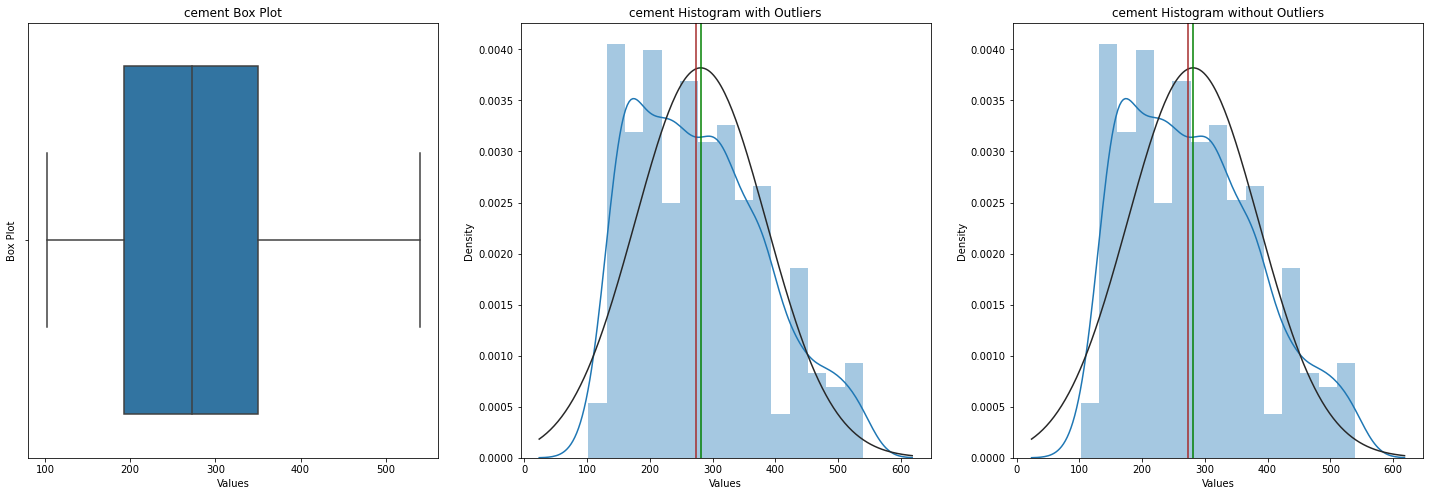

Feature slag does not have outliers




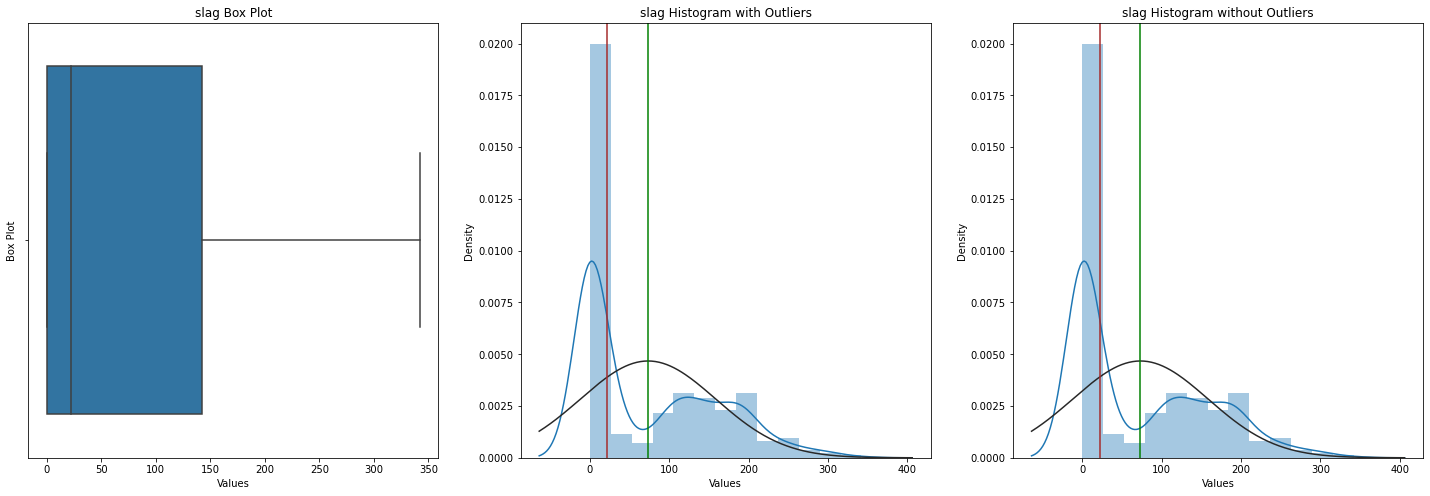

Feature ash does not have outliers




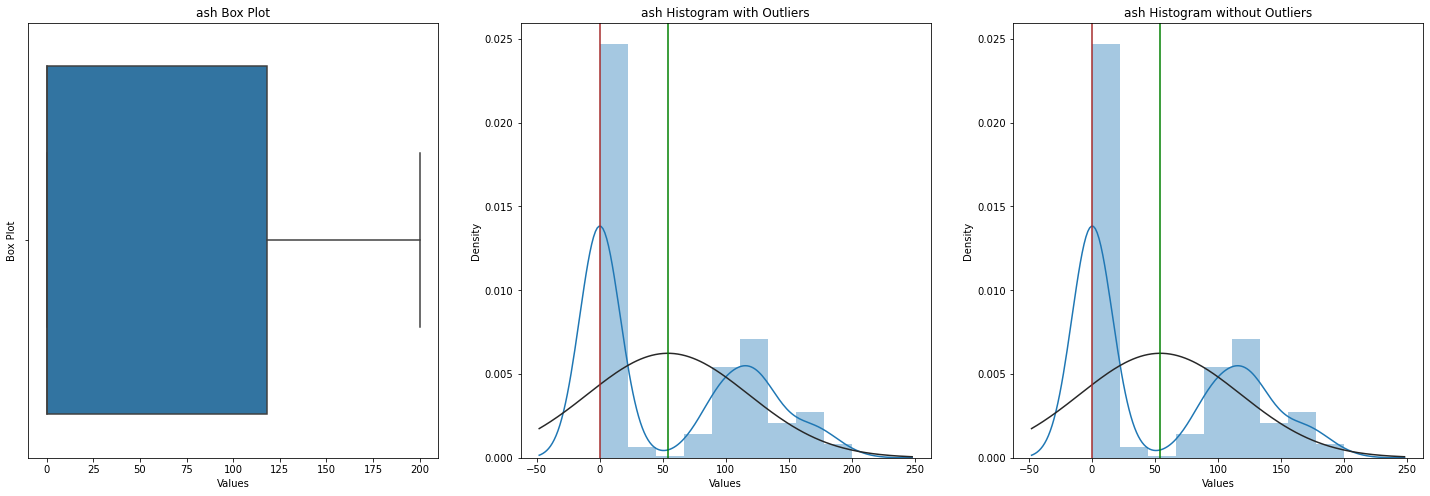

Feature water has outliers


Total number of outliers in water are 9


Outlier percentage in water is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


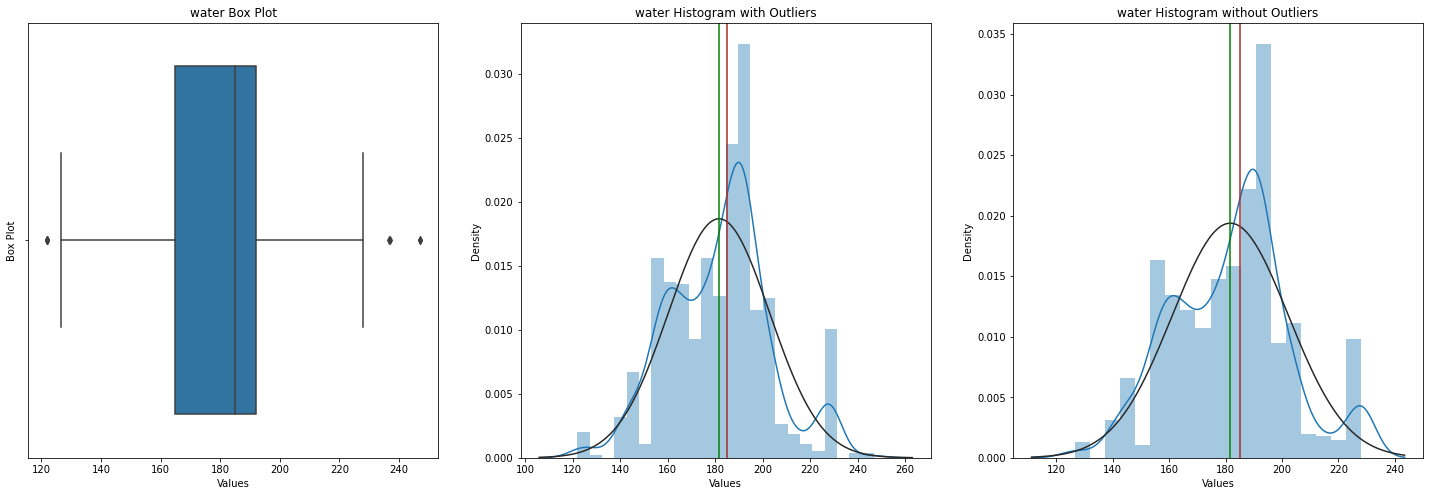

Feature superplastic has outliers


Total number of outliers in superplastic are 10


Outlier percentage in superplastic is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


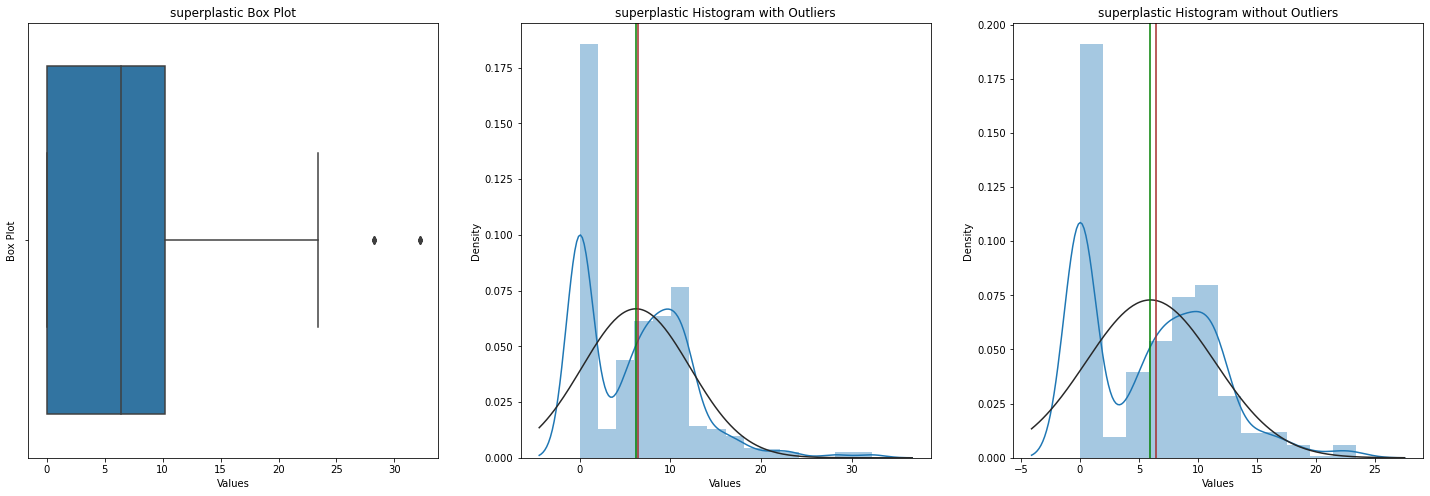

Feature coarseagg does not have outliers




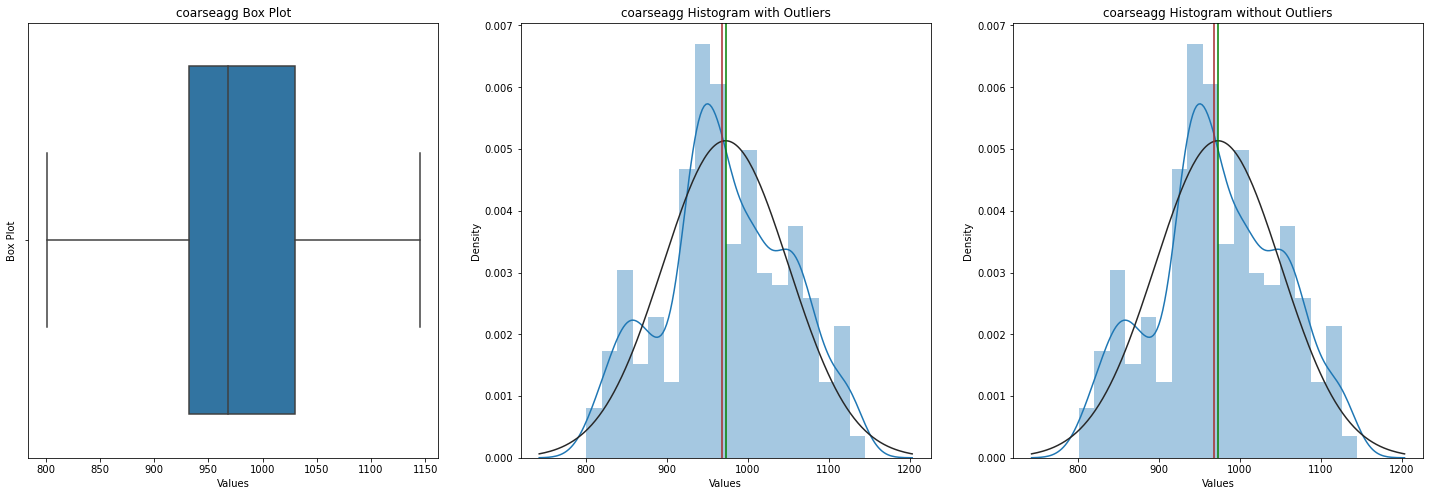

Feature fineagg has outliers


Total number of outliers in fineagg are 5


Outlier percentage in fineagg is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


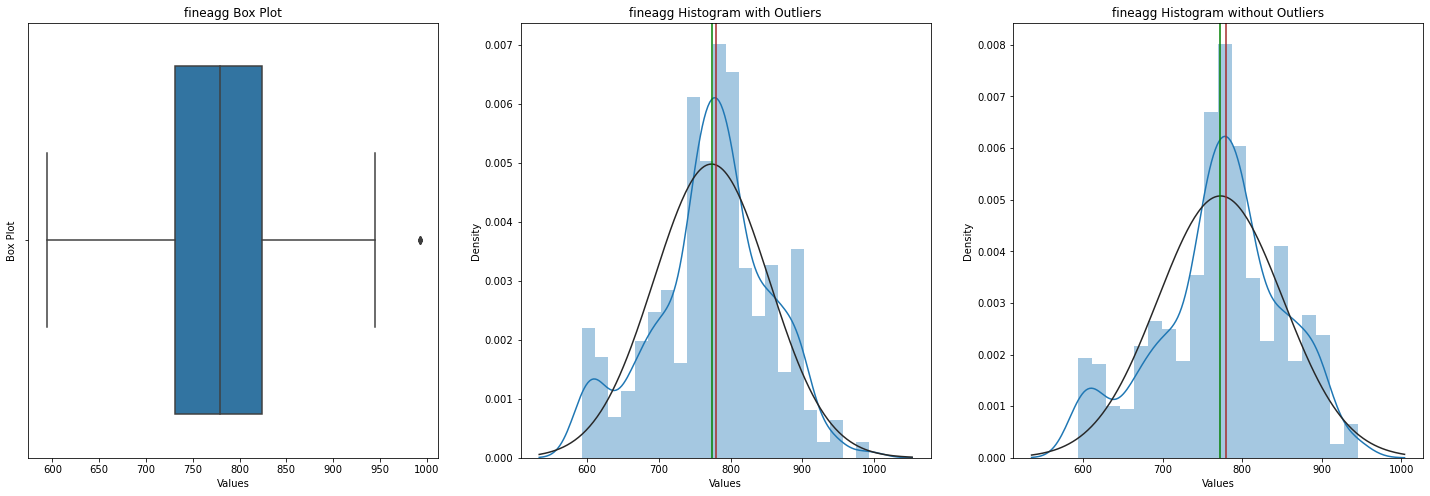

Feature age has outliers


Total number of outliers in age are 59


Outlier percentage in age is 6.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


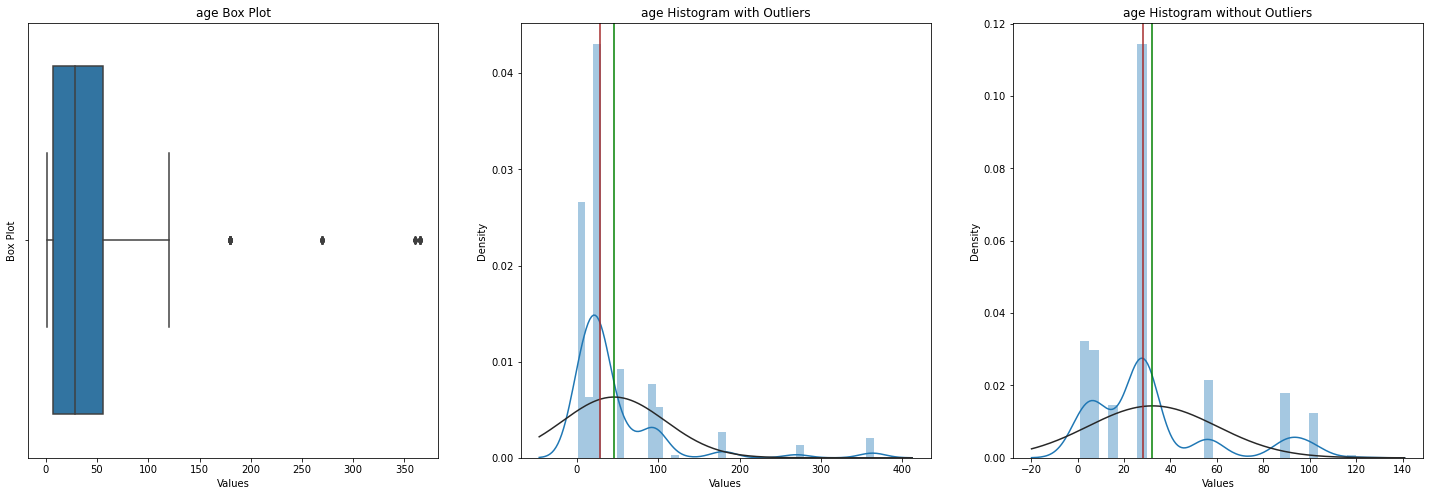

Feature strength has outliers


Total number of outliers in strength are 4


Outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


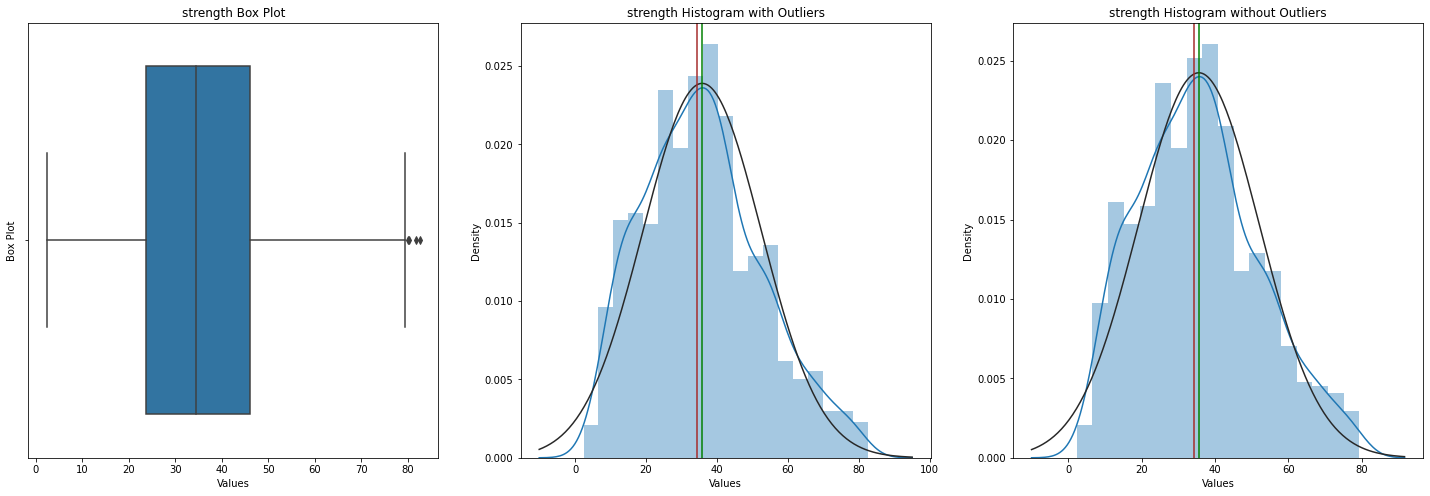

In [15]:
for col in df.columns:
    odt_plots(df, col)

### Multivariate Analysis using Regression

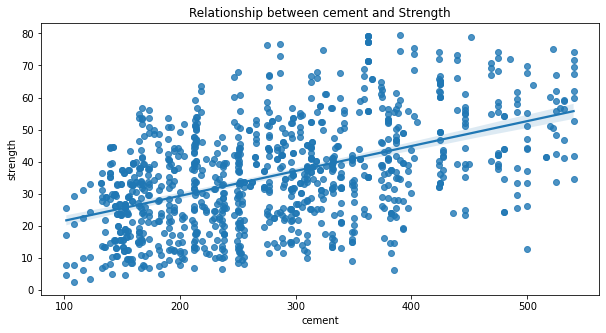

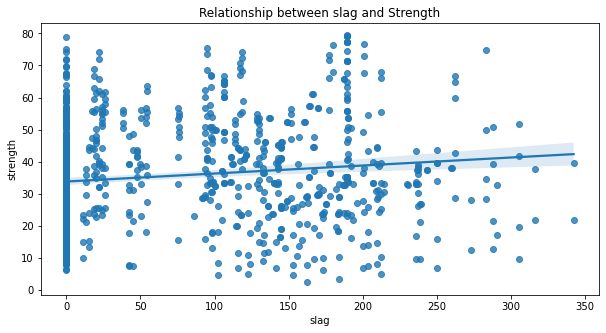

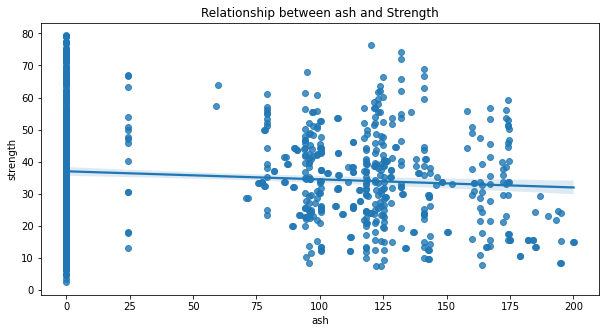

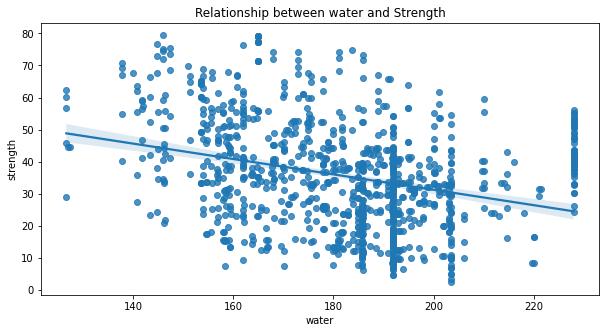

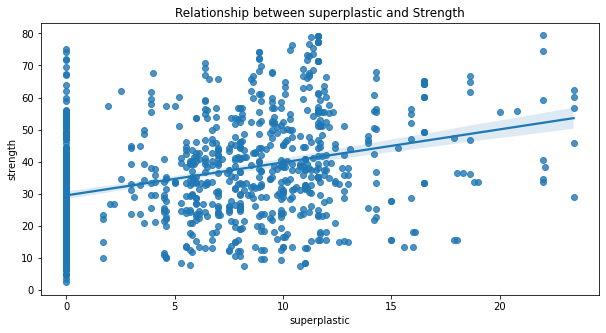

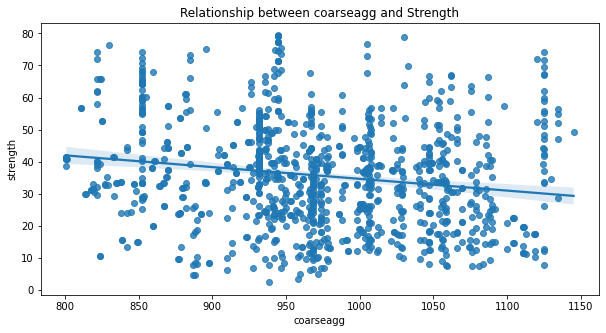

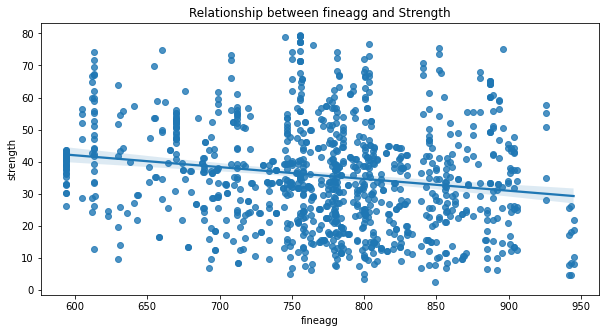

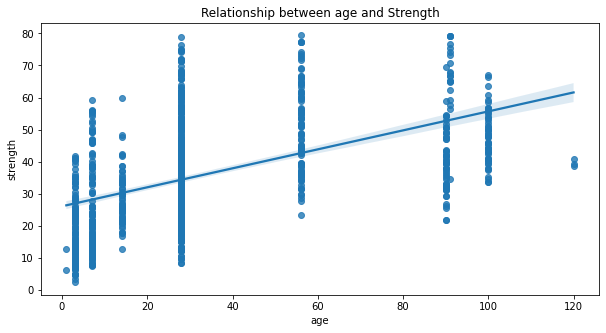

In [16]:
for col in df.columns:
    if col != "strength":
        fig, ax1 = plt.subplots(figsize = (10,5)) # Give anysize
        sns.regplot(x = df[col], y = df["strength"], ax = ax1). set_title(f'Relationship between {col} and Strength')
        

Analysis from Regression Plot
1. Strength and Cement are highly positively correlated
2. Slag and Strength are slightly positively correlated
3. Strength and Ash are slightly negatively correlated
4. Strength and Water are highly negatively correlated
5. Strength and superplastic are highly positively correlated
6. Strength and Coarseagg are highly negatively correlated
7. Strength and Fineagg are highly negatively correlated
8. Strength and Age are highly positively correlated

## Multi Collinearity Test
1. Correlation matrix/heat map(stage1)

<AxesSubplot:>

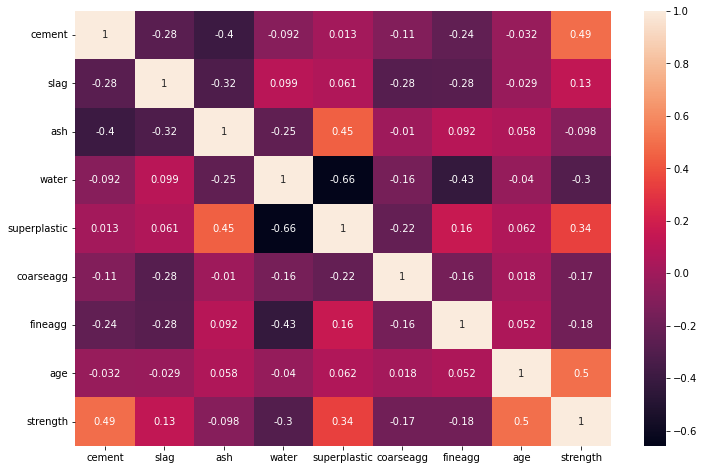

In [17]:
corr = df.corr()
df.ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr, annot = True)

Analysis from Stage 1 test
1. slag have high correlation with ash
2. ash has high correlation with cement
3. water 
4. cement has high correlation with stength

## Multi Collinearity test
1. VIF (Variance inflation factor) - Formula and range    (Home work)

### Correlation with target feature

In [18]:
def correlation_with_target(data, t_col):
    independent_variable = data.drop(t_col, axis = 1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable, corr_result], index = ['Independent Variables','Correlation']).T
    return result.sort_values('Correlation', ascending = False)

In [19]:
correlation_with_target(df, 'strength')

,Independent Variables,Correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.097973
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


Analysis of Correlation between dependent and independent
1. Age and Cement have 49% correlation with strength
2. Superplastic and water have 34% and 30% correlation with strength

## Applying PCA to treat Multi-Colinearity

In [20]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
# Applying StandardScalar for feature scaling(Feature Scaling Technique)
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    for i in range(1, n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
    print("Explained Variance Ratio after PCA is:", evr)
    # Creating a Dataframes of Principal Components 
    col = []
    for j in range(1, pcs + 1):
        col.append("PC_" + str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df



In [21]:
pca_df = custom_PCA(df.drop("strength",axis = 1))

Explained Variance Ratio after PCA is: [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [22]:
# 94% of the Information we are reatining
# 97.26% of the Information we are retaing (After StandardScaler)

In [23]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Joining PCA feature with target features

In [24]:
pca_df = pca_df.join(df["strength"], how = "left")  # left join using

In [25]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC_1      1030 non-null   float64
 1   PC_2      1030 non-null   float64
 2   PC_3      1030 non-null   float64
 3   PC_4      1030 non-null   float64
 4   PC_5      1030 non-null   float64
 5   PC_6      1030 non-null   float64
 6   strength  1030 non-null   float64
dtypes: float64(7)
memory usage: 56.5 KB


In [26]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29


## Model Building
Stages of Model Building
* Custom train test split function
* Cross Validation
* HyperParameter tuning

In [27]:
def train_and_test_split(data, tcol, testsize = 0.3, randomstate = 100): #tcol is target column
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X, y, test_size = testsize, random_state = randomstate)


In [28]:
# Step of train and test split
def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data, t_col)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name, rmse, r2]
    return result


In [29]:
model_builder(model_name = "LinearRegression", model = LinearRegression(), data = pca_df, t_col = "strength") # pca_df is used as eliminated components

['LinearRegression', 9.510886873673915, 0.6519519960039926]

In [30]:
# Model name, rmse, r2 score

In [31]:
def multiple_models(data, t_col):
    col_names = ["Model Name", "RMSE", "R2 Score"]
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder("Linear Regression", LinearRegression(), data, t_col)   # Calling model_builder function and it is already know to that
    result.loc[len(result)] = model_builder("Lasso Regression", Lasso(), data, t_col)
    result.loc[len(result)] = model_builder("Ridge Regression", Ridge(), data, t_col)
    result.loc[len(result)] = model_builder("DTR", DecisionTreeRegressor(), data, t_col)
    result.loc[len(result)] = model_builder("SVR", SVR(), data, t_col)
    result.loc[len(result)] = model_builder("KNN", KNeighborsRegressor(), data, t_col)
    result.loc[len(result)] = model_builder("Random Forest Regressor", RandomForestRegressor(), data, t_col)
    result.loc[len(result)] = model_builder("Ada Boost Regressor", AdaBoostRegressor(), data, t_col)
    result.loc[len(result)] = model_builder("Gradient Boosting Regressor", GradientBoostingRegressor(), data, t_col)
    result.loc[len(result)] = model_builder("xg Boosting Regressor", XGBRegressor(), data, t_col)
    #return result.sort_values("RMSE", ascending = False)
    return result.sort_values("R2 Score", ascending = False)

In [32]:
multiple_models(pca_df, "strength")

,Model Name,RMSE,R2 Score
9,xg Boosting Regressor,6.613111,0.831729
6,Random Forest Regressor,6.798738,0.822150
8,Gradient Boosting Regressor,7.073398,0.807490
5,KNN,8.045547,0.750938
3,DTR,8.477725,0.723461
7,Ada Boost Regressor,8.495247,0.722317
4,SVR,9.107654,0.680839
1,Lasso Regression,9.426183,0.658124
2,Ridge Regression,9.508918,0.652096
0,Linear Regression,9.510887,0.651952


In [33]:
# HW Sort above in descending order according to RMSE
# HW Diff between iloc and loc

### Cross Validation

In [34]:
def k_fold_cv(X, y, fold = 10):
    score_lr = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_ls = cross_val_score(Lasso(), X, y, cv = fold)
    score_rd = cross_val_score(Ridge(), X, y, cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(), X, y, cv = fold)
    score_svr = cross_val_score(SVR(), X, y, cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(), X, y, cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(), X, y, cv = fold)
    score_ab = cross_val_score(AdaBoostRegressor(), X, y, cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(), X, y, cv = fold)
    score_xb = cross_val_score(XGBRegressor(), X, y, cv = fold)
    
    model_name = ["Linear Regression", "Lasso", "Ridge", "DTR", "SVR", "KNN","Random Forest Regressor",
                 "Ada Boost Regressor", "Gradient Boosting Regressor", "xg Boosting Regressor"]
    scores = [score_lr, score_ls, score_rd, score_dtr, score_svr, score_knn,
             score_rf, score_ab, score_gb, score_xb]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        tmp = [m_name, score_mean, score_std]
        result.append(tmp)
    k_fold_df = pd.DataFrame(result, columns = ["Model Name", "CV Accuracy", "CV Standard Deviation"])
    return k_fold_df.sort_values("CV Accuracy", ascending = False)
    

In [35]:
k_fold_cv(pca_df.drop("strength", axis = 1), pca_df["strength"])

,Model Name,CV Accuracy,CV Standard Deviation
9,xg Boosting Regressor,0.873262,0.036061
6,Random Forest Regressor,0.864939,0.029373
8,Gradient Boosting Regressor,0.829044,0.050359
3,DTR,0.769481,0.066209
5,KNN,0.767720,0.055717
7,Ada Boost Regressor,0.730111,0.033758
4,SVR,0.703117,0.042765
2,Ridge,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso,0.649837,0.049887


## Hyperparameter Tuning

In [36]:
def tuning(X, y, fold = 10):
    param_LAS = {'alpha':[1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1,0,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_KNN = {'n_neighbors':[1,2,3,4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70]}
    param_DTR = {'max_depth':[3,5,7,9,10,12,14,16], 'max_features':['auto','sqrt','log2', 'sqrt', 2,3,4,5,6]}
    param_SVR = {'gamma':['scale', 'auto'],'C':[0.5, 1]}
    param_ADB = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_XGB = {'eta':[0.1,0.2,0.3,0.4,0.5], 'max_depth':[3,5,7,9,10,12,14,16], 'gamma':[0,10,20,30,40,50,60,70,80,90,100,200,300,400,500], 'reg_lambda':[0,1]}
    param_RF = {'max_depth':[3,5,7,9,10,12,14,16], 'max_features':['auto','sqrt','log2', 'sqrt', 2,3,4,5,6]}
    
    
    
# Hyperparameter tuning
    
    tune_LAS = GridSearchCV(Lasso(),param_LAS, cv = fold)
    tune_RID = GridSearchCV(Ridge(),param_LAS, cv = fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor(),param_KNN, cv = fold)
    tune_DTR = GridSearchCV(DecisionTreeRegressor(),param_DTR, cv = fold)
    tune_SVR = GridSearchCV(SVR(),param_SVR, cv = fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor(),param_ADB, cv = fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor(),param_GB, cv = fold)
    tune_XGB = GridSearchCV(XGBRegressor(),param_XGB, cv = fold)
    tune_RF = GridSearchCV(RandomForestRegressor(),param_RF, cv = fold)
    

#Fitting X and y variables

    tune_LAS.fit(X,y)
    tune_RID.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DTR.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)
    
    tune = [tune_LAS, tune_RID, tune_KNN, tune_DTR, tune_SVR, tune_ADB, tune_GB, tune_XGB, tune_RF]
    model_name = ["Lasso", "Ridge", "DTR", "SVR", "KNN","Random Forest Regressor",
                 "Ada Boost Regressor", "Gradient Boosting Regressor", "xg Boosting Regressor"]

    
    for i in range(len(tune)):
        print('Models :', models[i])
        print('Best Parameters :', tune[i].best_params_)
    

In [37]:
#tuning(pca_df.drop("strength", axis = 1), pca_df["strength"])

## Cross validation post Hyperparameter tuning

In [38]:
def cv_post_hpt(X, y, fold = 10):
    score_lr = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_ls = cross_val_score(Lasso(), X, y, cv = fold)
    score_rd = cross_val_score(Ridge(), X, y, cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(), X, y, cv = fold)
    score_svr = cross_val_score(SVR(), X, y, cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(), X, y, cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(), X, y, cv = fold)
    score_ab = cross_val_score(AdaBoostRegressor(), X, y, cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(), X, y, cv = fold)
    score_xb = cross_val_score(XGBRegressor(), X, y, cv = fold)
    
    model_name = ["Linear Regression", "Lasso", "Ridge", "DTR", "SVR", "KNN","Random Forest Regressor",
                 "Ada Boost Regressor", "Gradient Boosting Regressor", "xg Boosting Regressor"]
    scores = [score_lr, score_ls, score_rd, score_dtr, score_svr, score_knn,
             score_rf, score_ab, score_gb, score_xb]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        tmp = [m_name, score_mean, score_std]
        result.append(tmp)
    k_fold_df = pd.DataFrame(result, columns = ["Model Name", "CV Accuracy", "CV Standard Deviation"])
    return k_fold_df.sort_values("CV Accuracy", ascending = False)
    

In [39]:
cv_post_hpt(pca_df.drop("strength", axis = 1), pca_df["strength"])

,Model Name,CV Accuracy,CV Standard Deviation
9,xg Boosting Regressor,0.873262,0.036061
6,Random Forest Regressor,0.867004,0.032387
8,Gradient Boosting Regressor,0.828912,0.050490
5,KNN,0.767720,0.055717
3,DTR,0.766007,0.060871
7,Ada Boost Regressor,0.731103,0.038797
4,SVR,0.703117,0.042765
2,Ridge,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso,0.649837,0.049887


## Clustering
- Using K-Means Clustering to check if accuracy can be improved any further

<AxesSubplot:xlabel='cement', ylabel='strength'>

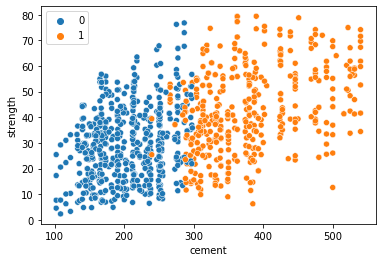

In [40]:
kmeans = KMeans(n_clusters = 2, random_state = 5)
clusters = kmeans.fit_predict(df.drop('strength', axis = 1))
sns.scatterplot(x = df['cement'], y = df['strength'], hue = clusters)

In [41]:
def clustering(X, t_col, clusters):
    column = list(set(list(X.columns)) - set(X['strength']))
    r = int(len(column)/2)
    if r%2 == 0:
        r = r
    else:
        r += 1
    f,ax = plt.subplots(r, 2, figsize = (15, 15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a != len(column):
                ax[row][col].scatter(X[t_col], X[column[a]], c = clusters)
                ax[row][col].set_xlabel(t_col)
                ax[row][col].set_ylabel(column[a])
                a += 1

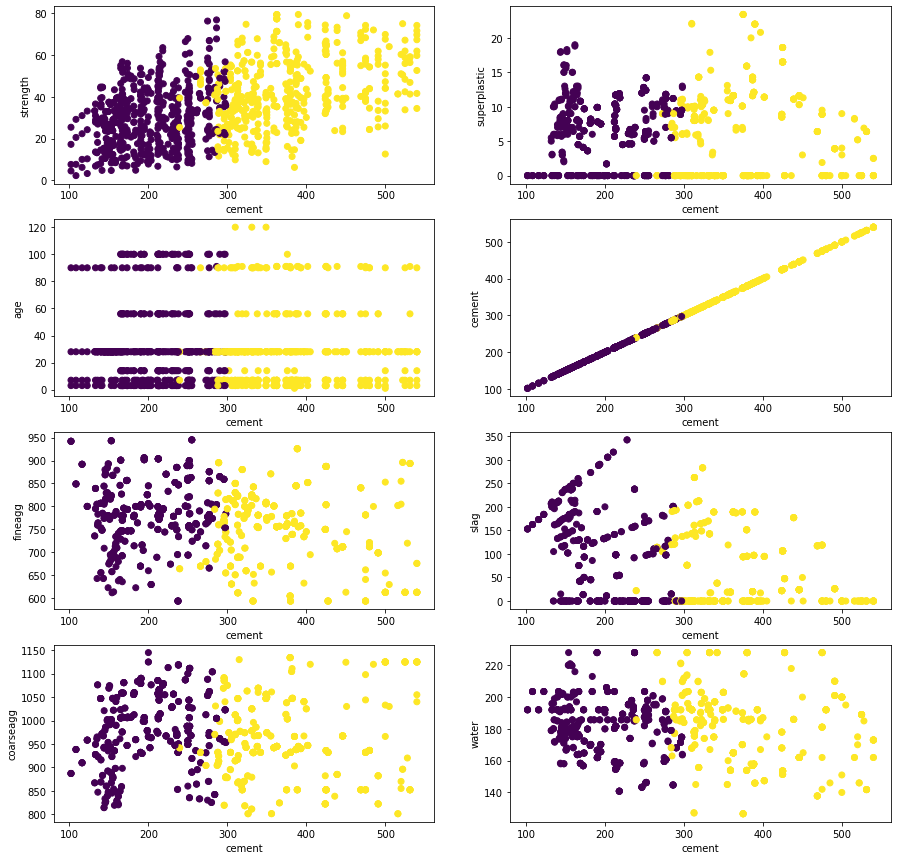

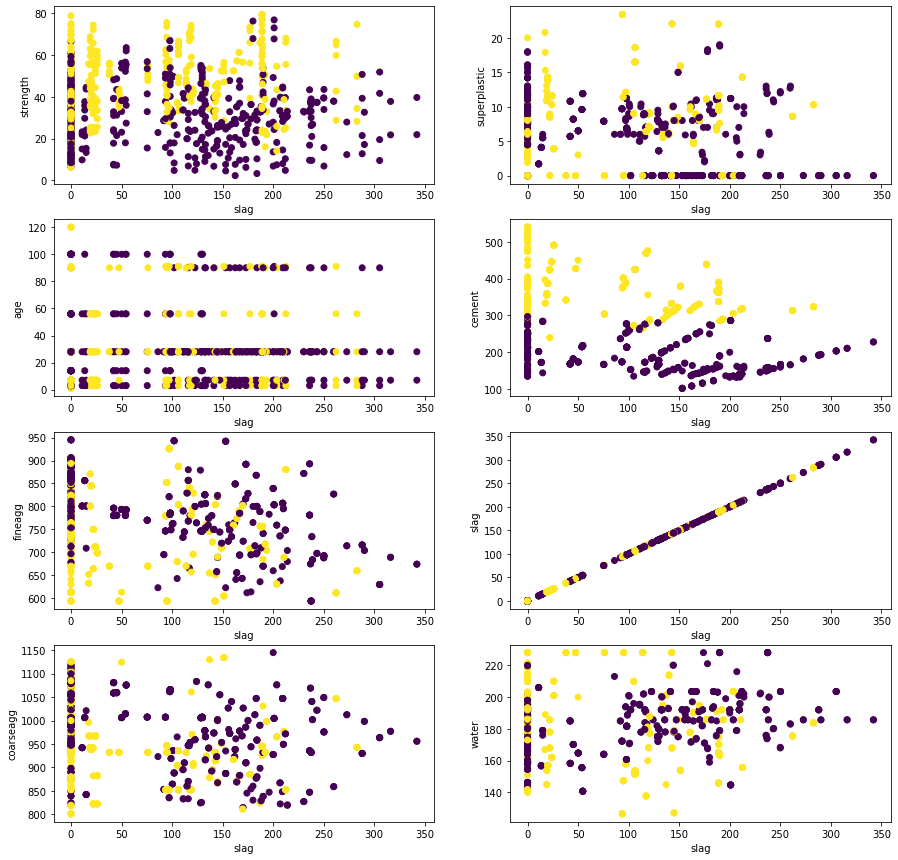

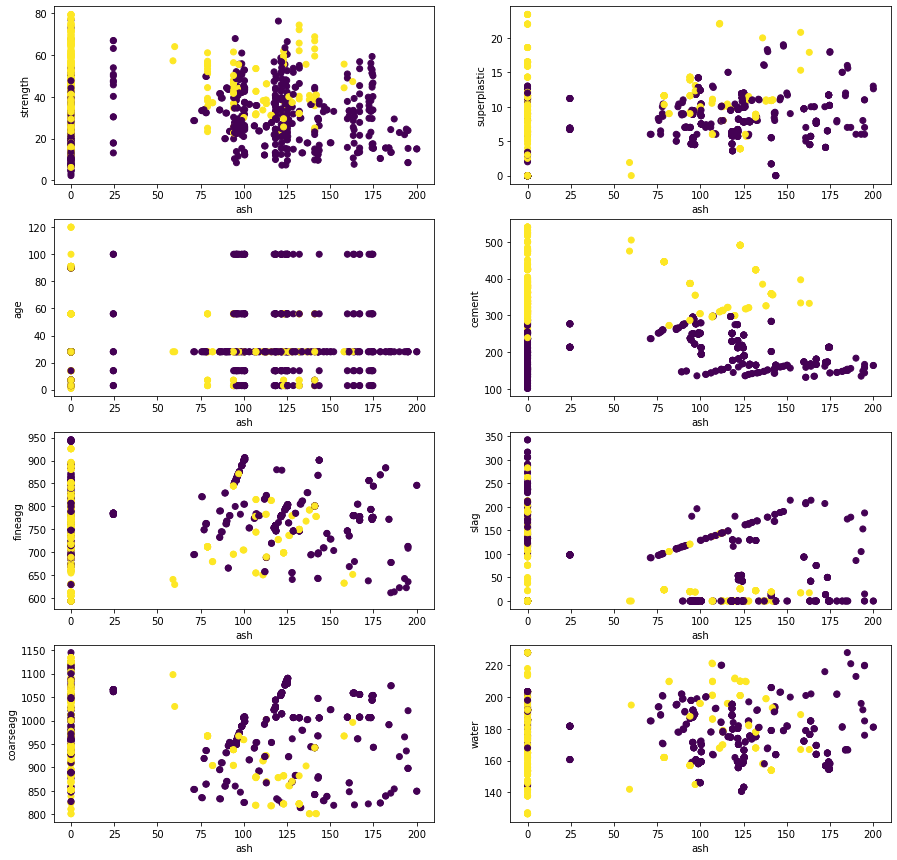

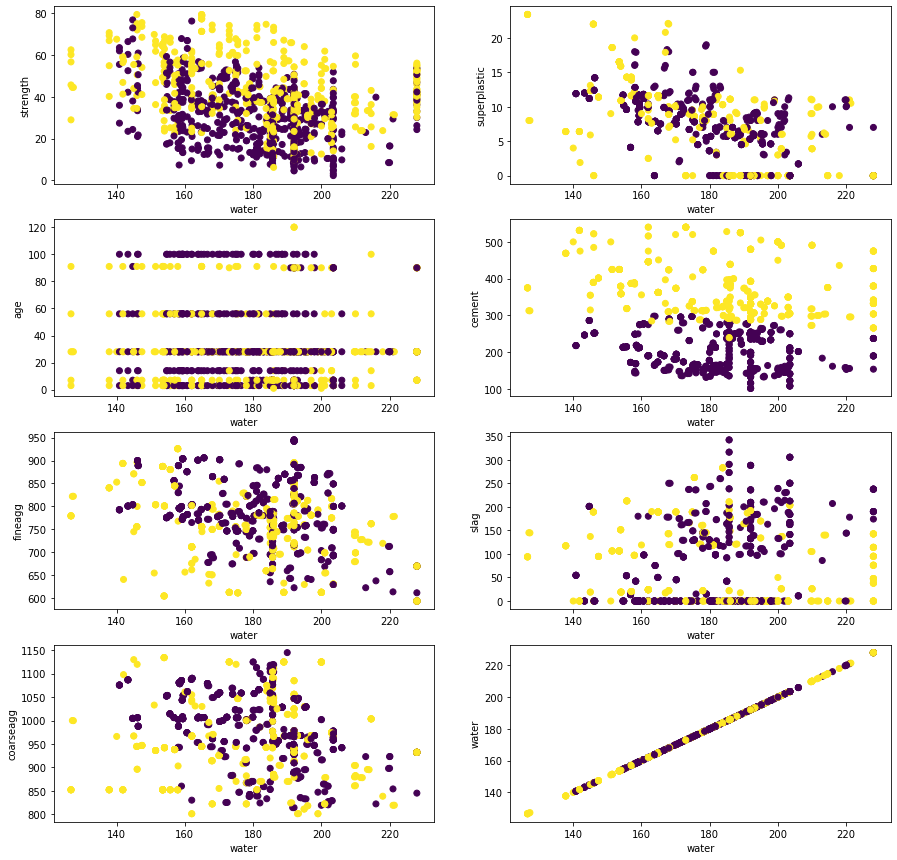

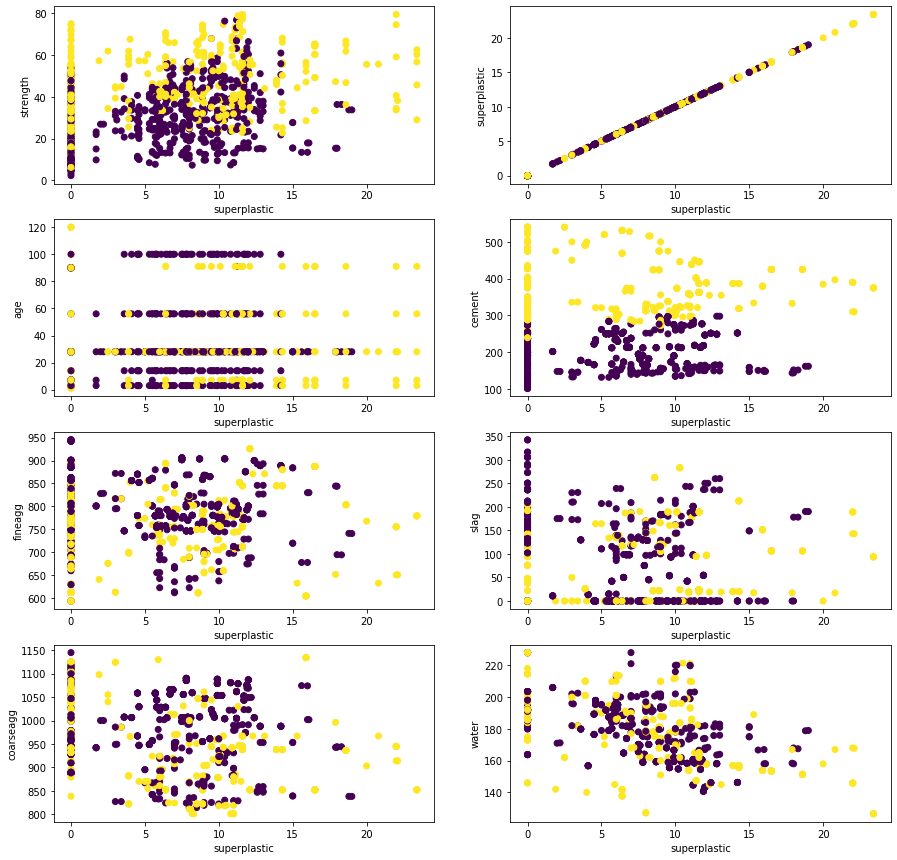

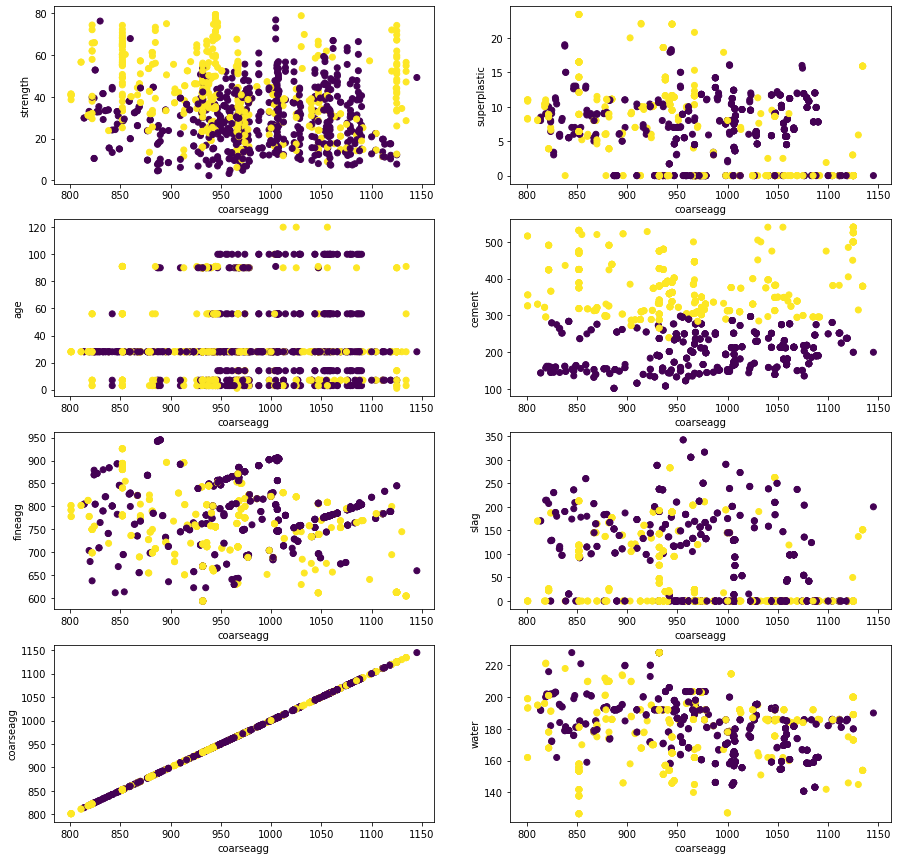

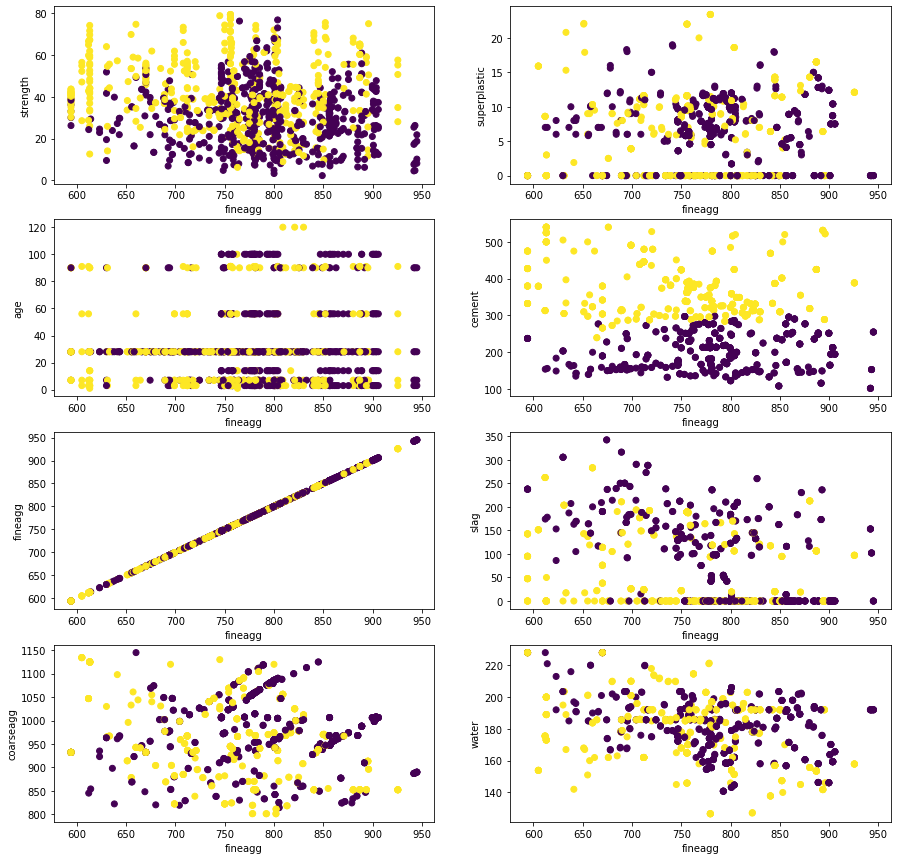

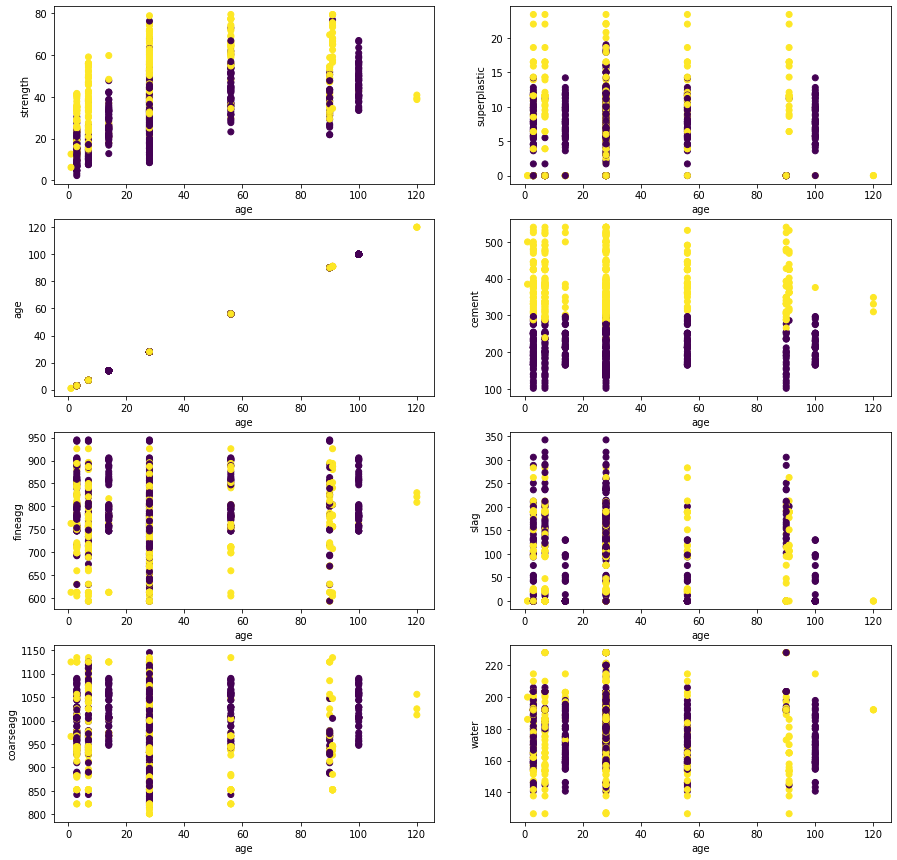

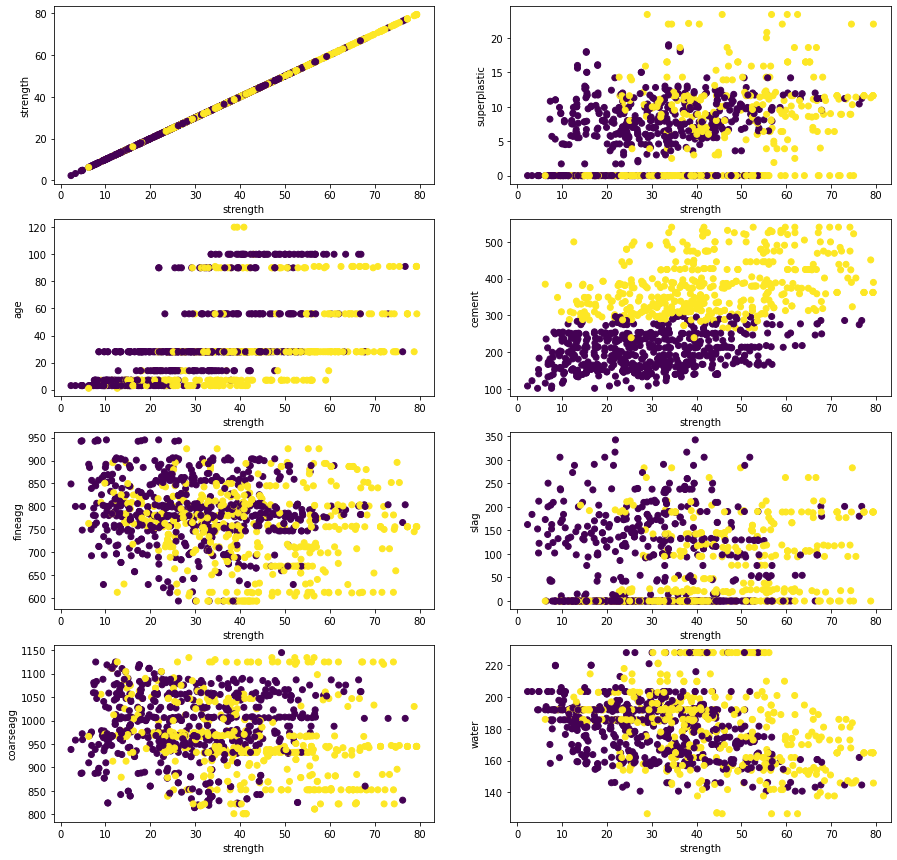

In [42]:
X = df.drop('strength', axis = 1)
for col in df.columns:
    clustering(df, col, clusters)

Analysis: 
- Cement is forming clusters with all other variables

In [43]:
new_df = df.join(pd.DataFrame(clusters, columns = ['clusters']), how = 'left')
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [44]:
new_df['clusters'].value_counts()

0    567
1    463
Name: clusters, dtype: int64

In [45]:
clusters_agg = new_df.groupby('clusters')['cement'].agg(['mean', 'median'])

In [46]:
clusters_agg

,mean,median
clusters,,
0,203.132804,202.0
1,376.731317,362.6


In [47]:
clusters_df = new_df.merge(clusters_agg, on = 'clusters', how = 'left')

In [48]:
clusters_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0,203.132804,202.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0,203.132804,202.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0,203.132804,202.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1,376.731317,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0,203.132804,202.0


In [49]:
multiple_models(clusters_df.drop('clusters', axis = 1), 'strength')

,Model Name,RMSE,R2 Score
9,xg Boosting Regressor,5.546408,0.881636
6,Random Forest Regressor,5.983378,0.862251
8,Gradient Boosting Regressor,6.136107,0.855129
3,DTR,7.789713,0.766525
7,Ada Boost Regressor,8.315604,0.733937
1,Lasso Regression,9.229025,0.672276
2,Ridge Regression,9.251133,0.670704
0,Linear Regression,9.251142,0.670703
5,KNN,9.923927,0.621065
4,SVR,14.199101,0.224255


In [50]:
X = clusters_df.drop(['strength', 'clusters'], axis =1)
y = clusters_df['strength']
k_fold_cv(X, y)

,Model Name,CV Accuracy,CV Standard Deviation
9,xg Boosting Regressor,0.899436,0.046856
6,Random Forest Regressor,0.887743,0.035920
8,Gradient Boosting Regressor,0.875776,0.044901
3,DTR,0.834068,0.054638
7,Ada Boost Regressor,0.741011,0.030157
2,Ridge,0.686641,0.062314
1,Lasso,0.686437,0.062413
0,Linear Regression,0.686179,0.062292
5,KNN,0.669395,0.088242
4,SVR,0.246843,0.044778


In [51]:
cv_post_hpt(X, y)

,Model Name,CV Accuracy,CV Standard Deviation
9,xg Boosting Regressor,0.899436,0.046856
6,Random Forest Regressor,0.886041,0.035480
8,Gradient Boosting Regressor,0.875503,0.044798
3,DTR,0.834144,0.056061
7,Ada Boost Regressor,0.739198,0.036183
2,Ridge,0.686641,0.062314
1,Lasso,0.686437,0.062413
0,Linear Regression,0.686179,0.062292
5,KNN,0.669395,0.088242
4,SVR,0.246843,0.044778


## Understanding Feature Importance using XGBoost

In [52]:
x_train, x_test, y_train, y_test = train_and_test_split(clusters_df.drop(['clusters'], axis = 1), 'strength')

In [53]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

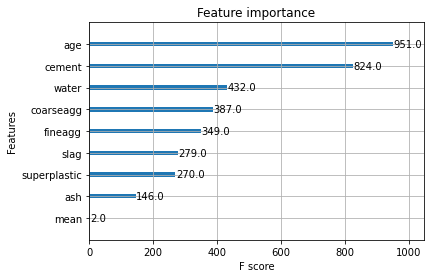

In [55]:
xgboost.plot_importance(xgb)

Analysis on XGBoost Feature Importance :
- Age and Cement are the two most important predicting strength of the mixture

In [57]:
imp_features = clusters_df[['age', 'cement', 'strength']] 

In [58]:
cv_post_hpt(imp_features, drop('strength', axis = 1))

NameError: name 'drop' is not defined